<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [5]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
reds = pd.read_csv('reds.txt', sep=',', header=None)
blues = pd.read_csv('blues.txt', sep=',', header=None)
# a = [x for x in range(1000)]
# red_pairs=[[i,reds[i]] for i in range(1000)]
# blue_pairs=[[i,blues[i]] for i in range(1000)]

In [22]:
a = list(range(len(reds)))
# print(x)

Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

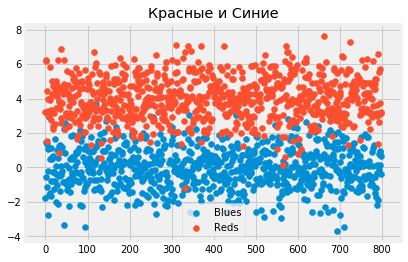

In [23]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], label='Blues')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], label='Reds')
plt.title('Красные и Синие')
plt.legend()
plt.show()

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [80]:
def guess_class(x,y,k):
    '''
        Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости
    '''
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,reds.iloc[:,1])
        plt.scatter(a,blues.iloc[:,1])
        plt.scatter(x,y)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
    draw_points(x,y)
    
    def distance_2d(b,c):
        '''
        Функция подсчета расстояния между двумя точками. Здесь b и с -- координаты точек на плоскости.
        '''
        return abs(b[0] - c[0]) + abs(b[1] - c[1])
        
    def calculate_k_distances(class_points):
        '''
        Функция подсчета расстояния до k ближайших точек класса class_points
        '''
        # print(class_points)
        distances = np.sort(np.array([distance_2d((x, y), p) for p in class_points.values]))[:k]
        return distances
             
    b = np.array(calculate_k_distances(blues)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(reds)) # расстояния до ближайших k соседей класса red
    
     # вам необходимо проверить расстояния до ближайших k точек и посмотреть, какой класс встречается чаще всего. 
    b = [(d, 'b') for d in b]
    r = [(d, 'r') for d in r]
    all_distances = b + r
    print(b, r)
    all_distances = list(sorted(all_distances))[:k]
    print(all_distances)
    cnt_reds = len([x for x in all_distances if x[1]=='r'])
    print(cnt_reds, k, 'red' if cnt_reds > k/2 else 'blue')
    

[(0.9790861139979532, 'b'), (3.665473851931619, 'b'), (3.729808131715355, 'b')] [(1.5705589429790088, 'r'), (2.3850295714645378, 'r'), (2.91354781991052, 'r')]
[(0.9790861139979532, 'b'), (1.5705589429790088, 'r'), (2.3850295714645378, 'r')]
2 3 red


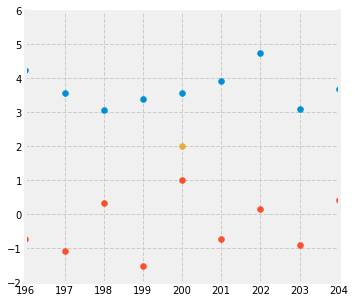

In [81]:
guess_class(200,2,3)